### Bus Lines Delay
### Visualization Plotting
#### Achilles Edwin Alfred Saxby

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [112]:
game = pd.read_csv("BDM_Game_Output.csv")
no_game = pd.read_csv("BDM_NoGame_Output.csv")

In [113]:
game.head()

,Unnamed: 0,date,bus,direction,interval,count(id),avg(duration),is_game_bus
0,0,2014-08-09,BX1,1,12:00-12:15,1,4467.000000,1
1,1,2014-08-09,BX1,1,12:15-12:30,3,4627.666667,1
2,2,2014-08-09,BX1,1,12:45-13:00,1,5257.000000,1
3,3,2014-08-09,BX1,1,13:15-13:30,3,4969.333333,1
4,4,2014-08-09,BX1,1,15:45-16:00,4,4235.250000,1


In [114]:
no_game.head()

,Unnamed: 0,date,bus,direction,interval,count(id),avg(duration),is_game_bus
0,0,2014-08-09,BX1,1,11:30-11:45,1,4286.000000,0
1,1,2014-08-09,BX1,1,14:30-14:45,3,4110.000000,0
2,2,2014-08-09,BX1,1,14:45-15:00,3,4066.333333,0
3,3,2014-08-09,BX1,1,15:00-15:15,2,3100.000000,0
4,4,2014-08-09,BX1,1,15:15-15:30,3,3958.666667,0


In [115]:
no_game.interval.unique()

array(['11:30-11:45', '14:30-14:45', '14:45-15:00', '15:00-15:15',
       '15:15-15:30', '15:30-15:45', '17:45-18:00', '18:00-18:15',
       '18:15-18:30', '18:30-18:45', '18:45-19:00', '19:00-19:15',
       '19:15-19:30', '19:30-19:45', '20:00-20:15', '20:15-20:30',
       '21:30-21:45', '21:45-22:00', '22:00-22:15', '22:15-22:30',
       '22:30-22:45', '23:00-23:15', '23:15-23:30', '22:45-23:00',
       '11:45-12:00', '12:00-12:15', '12:15-12:30', '12:45-13:00',
       '13:00-13:15', '13:15-13:30', '15:45-16:00', '16:00-16:15',
       '16:15-16:30', '16:30-16:45', '16:45-17:00', '17:00-17:15',
       '17:15-17:30', '17:30-17:45', '12:30-12:45'], dtype=object)

In [116]:
no_game['count(id)'].unique()

array([ 1,  3,  2,  4,  5,  6,  7,  8,  9, 10, 12, 21, 11])

In [117]:
game.date.dtype

dtype('O')

In [118]:
game.date.describe()

count          14850
unique           229
top       2016-08-13
freq             131
Name: date, dtype: object

In [119]:
game.date = pd.to_datetime(game.date)

In [120]:
game.date.describe()

count                   14850
unique                    229
top       2016-08-13 00:00:00
freq                      131
first     2014-08-09 00:00:00
last      2016-10-02 00:00:00
Name: date, dtype: object

In [121]:
no_game.date.describe()

count          23148
unique           229
top       2016-08-26
freq             214
Name: date, dtype: object

In [122]:
no_game.date = pd.to_datetime(no_game.date)

In [123]:
no_game.date.describe()

count                   23148
unique                    229
top       2016-08-26 00:00:00
freq                      214
first     2014-08-09 00:00:00
last      2016-10-02 00:00:00
Name: date, dtype: object

In [124]:
game.bus.unique()

array(['BX1', 'BX13', 'BX6', 'Q48'], dtype=object)

In [125]:
no_game.bus.unique()

array(['BX1', 'BX13', 'BX6', 'Q48'], dtype=object)

In [128]:
game_day_aggregation = game.groupby(['bus', 'interval']).agg({'avg(duration)':'mean'})
game_day_aggregation.head()

avg(duration)
bus interval                  
BX1 11:45-12:00    4372.285768
    12:00-12:15    4381.176863
    12:15-12:30    4377.000969
    12:30-12:45    4419.304566
    12:45-13:00    4680.273674

In [129]:
non_game_day_aggregation = no_game.groupby(['bus', 'interval']).agg({'avg(duration)':'mean'})
non_game_day_aggregation.head()

avg(duration)
bus interval                  
BX1 11:30-11:45    4136.682527
    11:45-12:00    4156.528704
    12:00-12:15    4277.963462
    12:15-12:30    4383.710638
    12:30-12:45    4370.218079

In [130]:
game_day_aggregation.reset_index(inplace=True)

In [131]:
non_game_day_aggregation.reset_index(inplace=True)

In [133]:
game_day_aggregation.head()

,bus,interval,avg(duration)
0,BX1,11:45-12:00,4372.285768
1,BX1,12:00-12:15,4381.176863
2,BX1,12:15-12:30,4377.000969
3,BX1,12:30-12:45,4419.304566
4,BX1,12:45-13:00,4680.273674


In [132]:
non_game_day_aggregation.head()

,bus,interval,avg(duration)
0,BX1,11:30-11:45,4136.682527
1,BX1,11:45-12:00,4156.528704
2,BX1,12:00-12:15,4277.963462
3,BX1,12:15-12:30,4383.710638
4,BX1,12:30-12:45,4370.218079


In [152]:
bx1_game = game_day_aggregation[(game_day_aggregation['bus'] == 'BX1')]
bx1_game.reset_index(inplace=True, drop=True)
bx1_game.shape

(40, 3)

In [154]:
bx1_non_game = non_game_day_aggregation[(non_game_day_aggregation['bus'] == 'BX1')]
bx1_non_game.reset_index(inplace=True, drop=True)
bx1_non_game.shape

(39, 3)

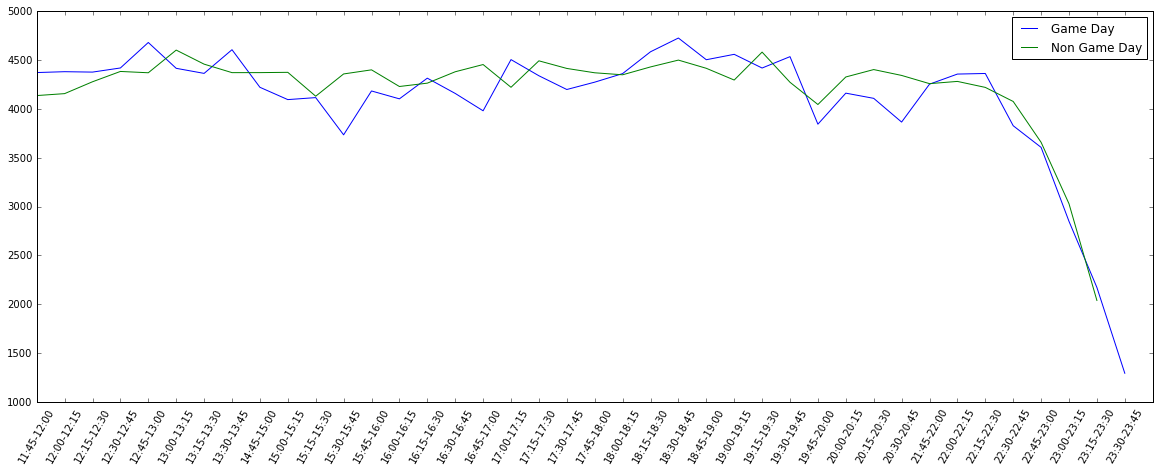

In [155]:
plt.figure(figsize=(20,7))
plt.plot(bx1_game.index, bx1_game['avg(duration)'], label = 'Game Day')
plt.plot(bx1_non_game.index, bx1_non_game['avg(duration)'], label = 'Non Game Day')
labels = list(bx1_game.interval)
plt.xticks(bx1_game.index,labels, rotation = 60)
plt.legend()
plt.show()

In [156]:
bx13_game = game_day_aggregation[(game_day_aggregation['bus'] == 'BX13')]
bx13_game.reset_index(inplace=True, drop=True)
bx13_game.shape

(40, 3)

In [157]:
bx13_non_game = non_game_day_aggregation[(non_game_day_aggregation['bus'] == 'BX13')]
bx13_non_game.reset_index(inplace=True, drop=True)
bx13_non_game.shape

(39, 3)

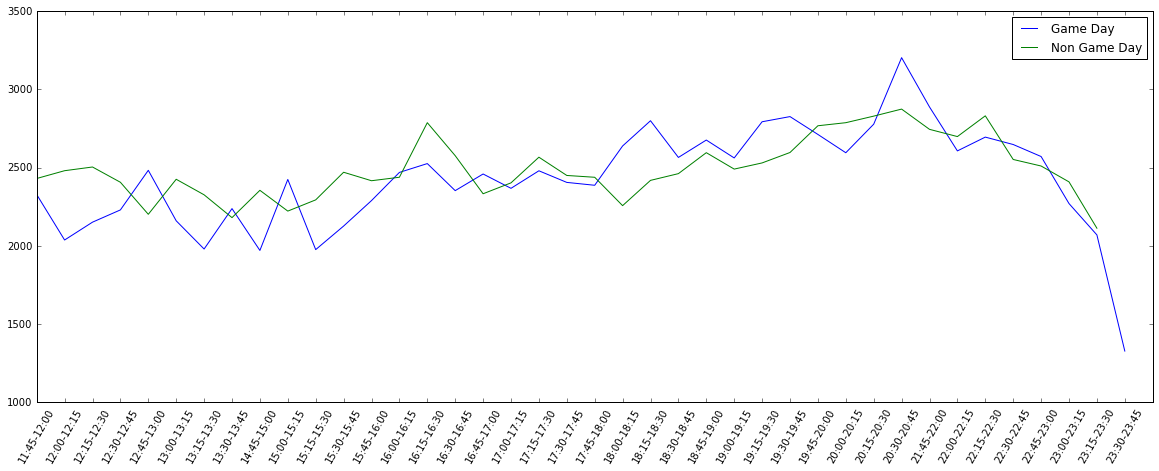

In [158]:
plt.figure(figsize=(20,7))
plt.plot(bx13_game.index, bx13_game['avg(duration)'], label = 'Game Day')
plt.plot(bx13_non_game.index, bx13_non_game['avg(duration)'], label = 'Non Game Day')
labels = list(bx13_game.interval)
plt.xticks(bx13_game.index,labels, rotation = 60)
plt.legend()
plt.show()

In [160]:
bx6_game = game_day_aggregation[(game_day_aggregation['bus'] == 'BX6')]
bx6_game.reset_index(inplace=True, drop=True)
bx6_game.shape

(40, 3)

In [163]:
bx6_non_game = non_game_day_aggregation[(non_game_day_aggregation['bus'] == 'BX6')]
bx6_non_game.reset_index(inplace=True, drop=True)
bx6_non_game.shape

(39, 3)

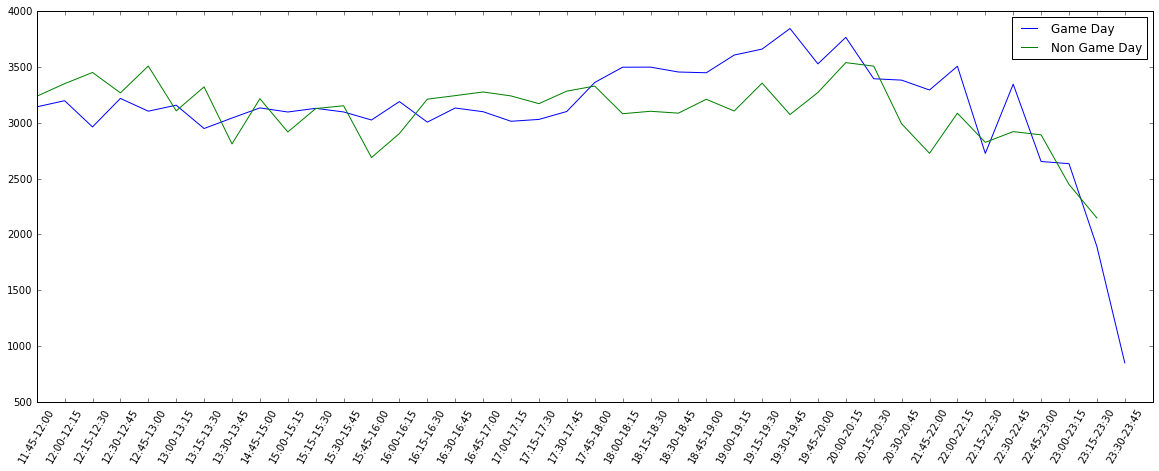

In [164]:
plt.figure(figsize=(20,7))
plt.plot(bx6_game.index, bx6_game['avg(duration)'], label = 'Game Day')
plt.plot(bx6_non_game.index, bx6_non_game['avg(duration)'], label = 'Non Game Day')
labels = list(bx6_game.interval)
plt.xticks(bx6_game.index,labels, rotation = 60)
plt.legend()
plt.show()

In [166]:
q48_game = game_day_aggregation[(game_day_aggregation['bus'] == 'Q48')]
q48_game.reset_index(inplace=True, drop=True)
q48_game.shape

(39, 3)

In [167]:
q48_non_game = non_game_day_aggregation[(non_game_day_aggregation['bus'] == 'Q48')]
q48_non_game.reset_index(inplace=True, drop=True)
q48_non_game.shape

(39, 3)

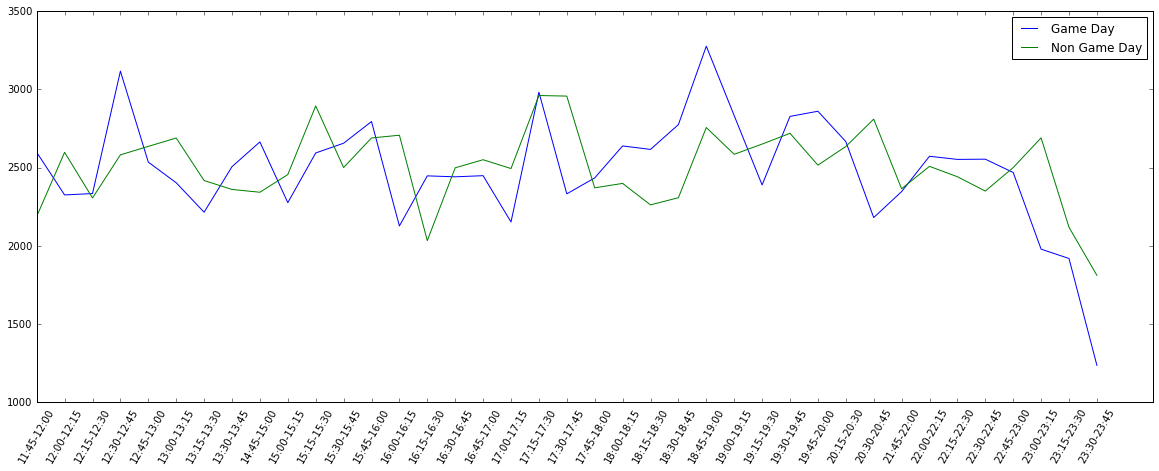

In [168]:
plt.figure(figsize=(20,7))
plt.plot(q48_game.index, q48_game['avg(duration)'], label = 'Game Day')
plt.plot(q48_non_game.index, q48_non_game['avg(duration)'], label = 'Non Game Day')
labels = list(q48_game.interval)
plt.xticks(q48_game.index,labels, rotation = 60)
plt.legend()
plt.show()

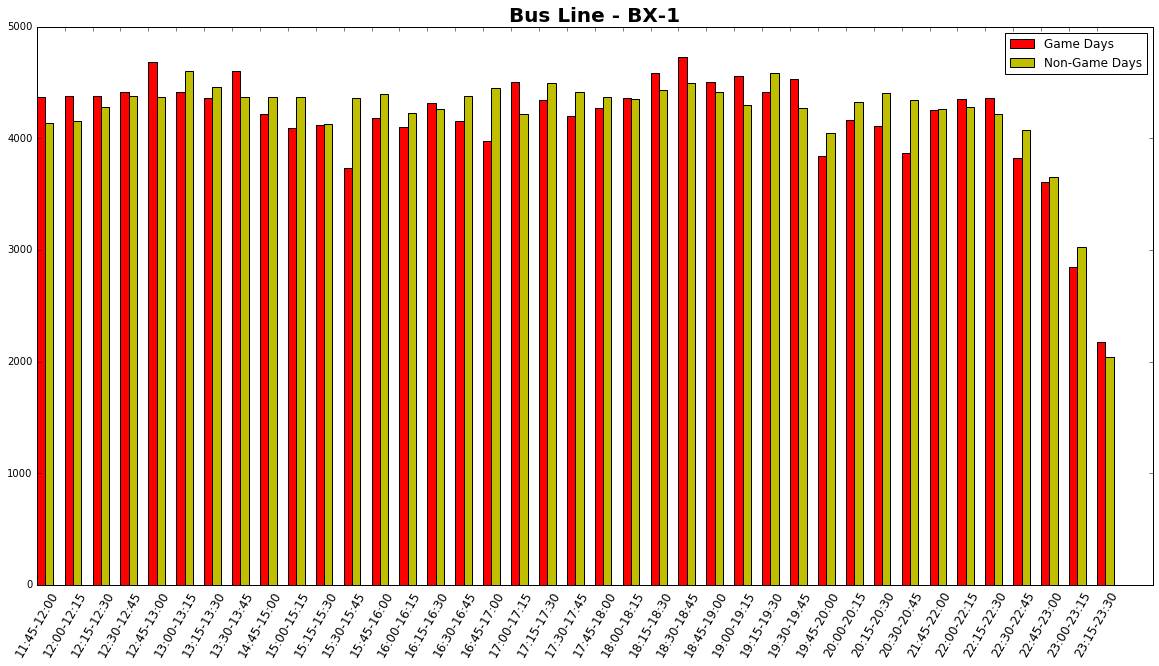

In [212]:
fig = plt.figure(figsize=(20,10))
ax = fig.gca()

N = 39
ind = np.arange(N)
width = 0.30

rects1 = ax.bar(ind, bx1_game['avg(duration)'][:39], width, color='r')
rects2 = ax.bar(ind + width, bx1_non_game['avg(duration)'], width, color='y')

labels = list(bx1_game.interval)

ax.set_xticks(ind)
# ax.set_ylim(0, 80)
ax.set_xticklabels(labels, rotation = 60, fontsize = 12)
ax.set_title("Bus Line - BX-1", fontweight = 'bold', fontsize = 20)
ax.legend((rects1[0], rects2[0]), ('Game Days', 'Non-Game Days'))


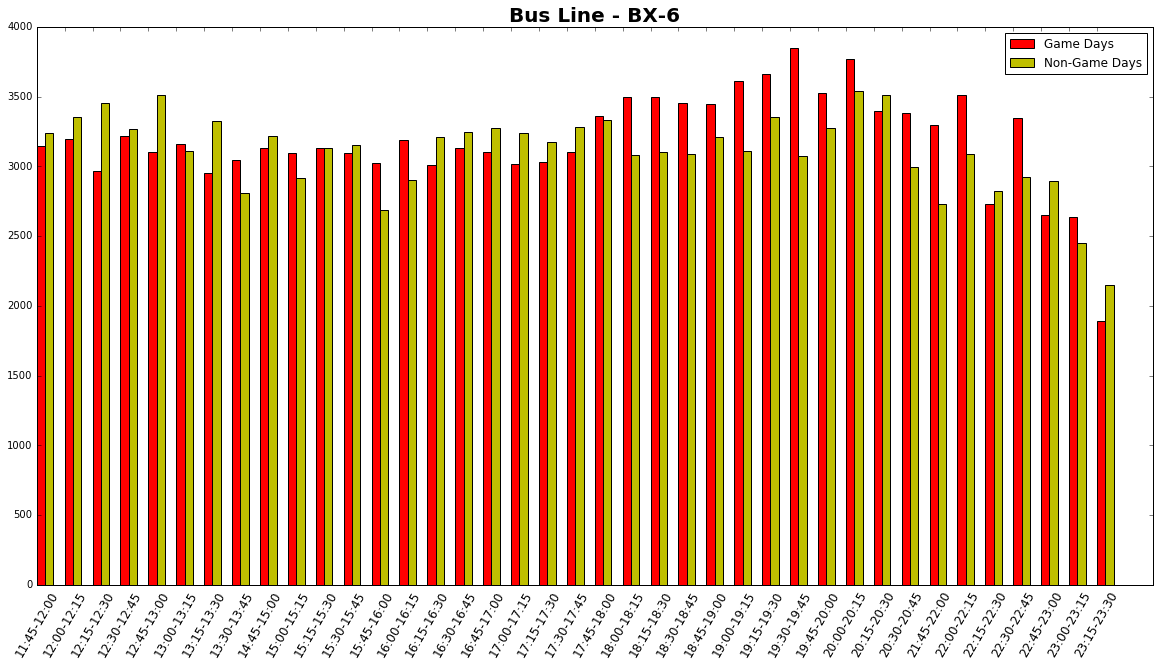

In [206]:
fig = plt.figure(figsize=(20,10))
ax = fig.gca()

N = 39
ind = np.arange(N)
width = 0.30

rects1 = ax.bar(ind, bx6_game['avg(duration)'][:39], width, color='r')
rects2 = ax.bar(ind + width, bx6_non_game['avg(duration)'], width, color='y')

labels = list(bx1_game.interval)

ax.set_xticks(ind)
# ax.set_ylim(0, 80)
ax.set_xticklabels(labels, rotation = 60, fontsize = 12)
ax.set_title("Bus Line - BX-6", fontweight = 'bold', fontsize = 20)
ax.legend((rects1[0], rects2[0]), ('Game Days', 'Non-Game Days'))

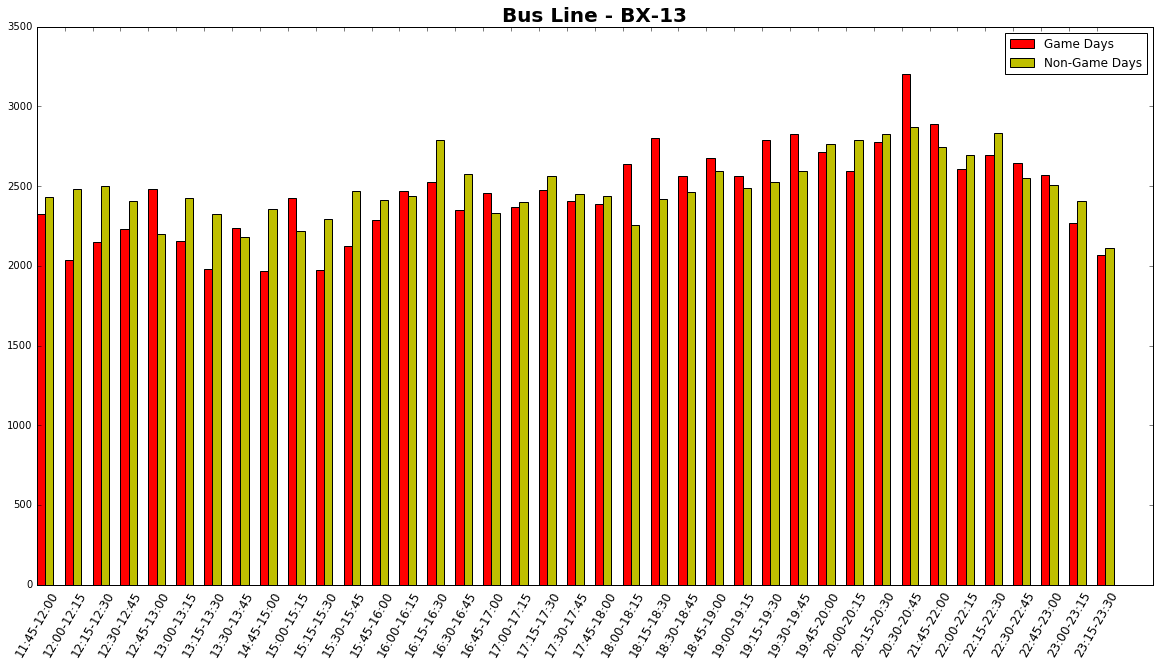

In [207]:
fig = plt.figure(figsize=(20,10))
ax = fig.gca()

N = 39
ind = np.arange(N)
width = 0.30

rects1 = ax.bar(ind, bx13_game['avg(duration)'][:39], width, color='r')
rects2 = ax.bar(ind + width, bx13_non_game['avg(duration)'], width, color='y')

labels = list(bx1_game.interval)

ax.set_xticks(ind)
# ax.set_ylim(0, 80)
ax.set_xticklabels(labels, rotation = 60, fontsize = 12)
ax.set_title("Bus Line - BX-13", fontweight = 'bold', fontsize = 20)
ax.legend((rects1[0], rects2[0]), ('Game Days', 'Non-Game Days'))

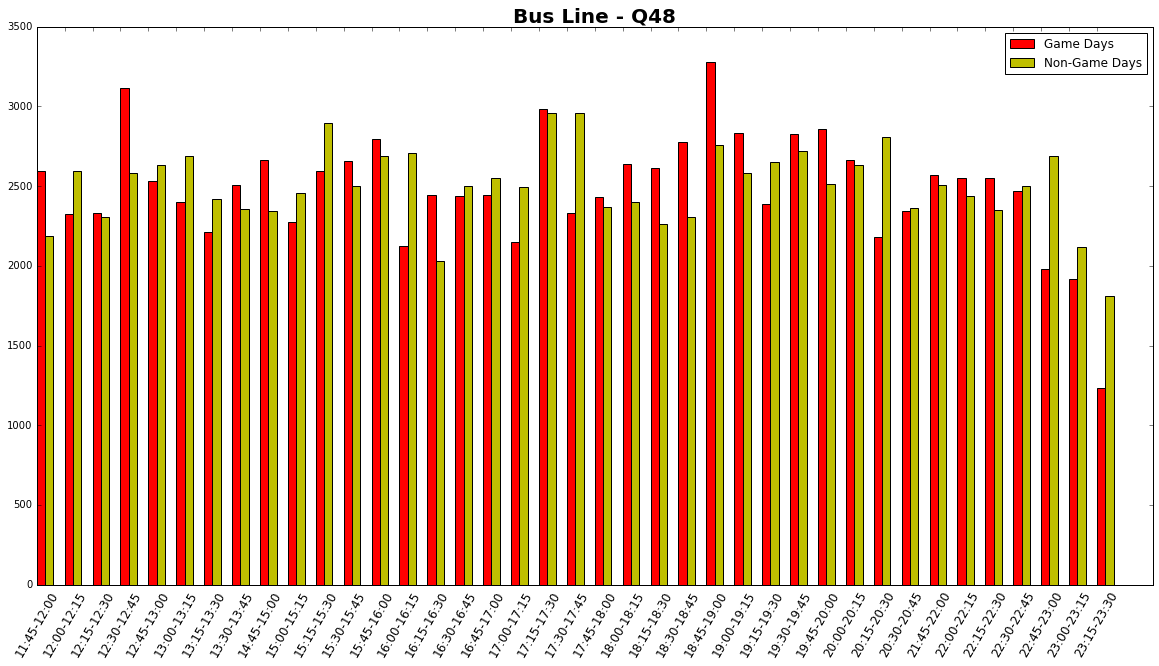

In [208]:
fig = plt.figure(figsize=(20,10))
ax = fig.gca()

N = 39
ind = np.arange(N)
width = 0.30

rects1 = ax.bar(ind, q48_game['avg(duration)'][:39], width, color='r')
rects2 = ax.bar(ind + width, q48_non_game['avg(duration)'], width, color='y')

labels = list(bx1_game.interval)

ax.set_xticks(ind)
# ax.set_ylim(0, 80)
ax.set_xticklabels(labels, rotation = 60, fontsize = 12)
ax.set_title("Bus Line - Q48", fontweight = 'bold', fontsize = 20)
ax.legend((rects1[0], rects2[0]), ('Game Days', 'Non-Game Days'))

In [223]:
game_day_aggregation_mix = game.groupby(['interval']).agg({'avg(duration)':'mean'})
game_day_aggregation_mix.head()

,avg(duration)
interval,
11:45-12:00,3113.334658
12:00-12:15,2954.138935
12:15-12:30,2895.872485
12:30-12:45,2983.468031
12:45-13:00,3237.898922


In [224]:
game_day_aggregation_mix.reset_index(inplace=True)
game_day_aggregation_mix.shape

(40, 2)

In [225]:
game_day_aggregation_mix.head()

,interval,avg(duration)
0,11:45-12:00,3113.334658
1,12:00-12:15,2954.138935
2,12:15-12:30,2895.872485
3,12:30-12:45,2983.468031
4,12:45-13:00,3237.898922


In [226]:
non_game_day_aggregation_mix = no_game.groupby(['interval']).agg({'avg(duration)':'mean'})
non_game_day_aggregation_mix.head()

,avg(duration)
interval,
11:30-11:45,2993.481372
11:45-12:00,3137.634546
12:00-12:15,3072.399295
12:15-12:30,3130.872764
12:30-12:45,3015.758242


In [227]:
non_game_day_aggregation_mix.reset_index(inplace=True)
non_game_day_aggregation_mix.shape

(39, 2)

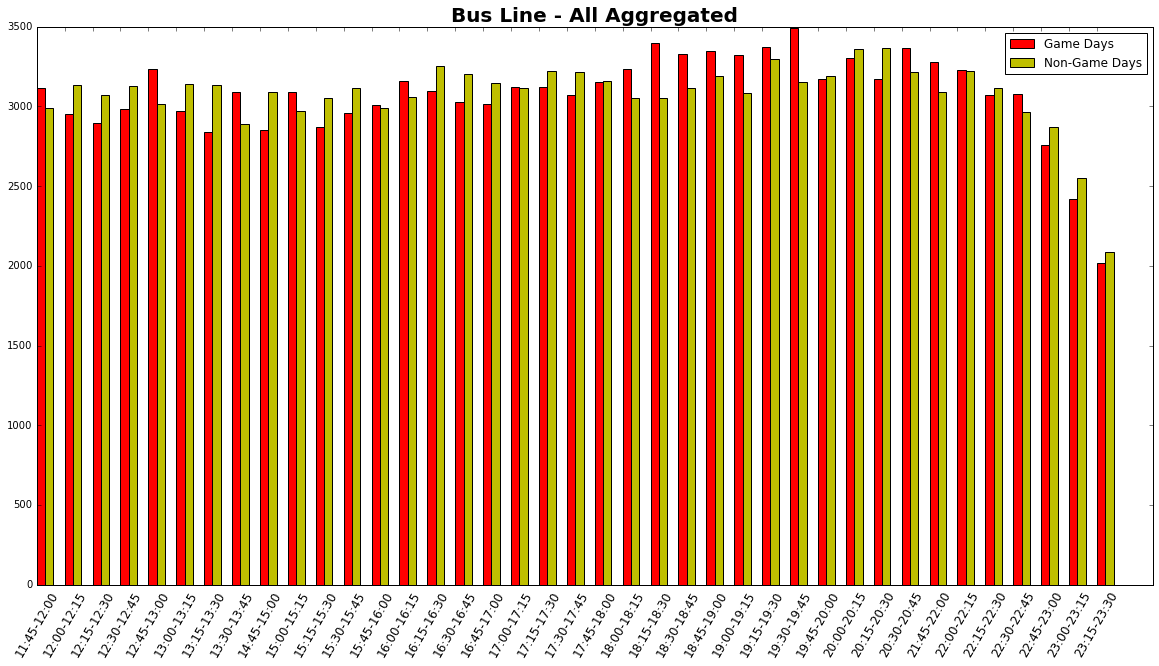

In [228]:
fig = plt.figure(figsize=(20,10))
ax = fig.gca()

N = 39
ind = np.arange(N)
width = 0.30

rects1 = ax.bar(ind, game_day_aggregation_mix['avg(duration)'][:39], width, color='r')
rects2 = ax.bar(ind + width, non_game_day_aggregation_mix['avg(duration)'], width, color='y')

labels = list(game_day_aggregation_mix.interval)

ax.set_xticks(ind)
# ax.set_ylim(0, 80)
ax.set_xticklabels(labels, rotation = 60, fontsize = 12)
ax.set_title("Bus Line - All Aggregated", fontweight = 'bold', fontsize = 20)
ax.legend((rects1[0], rects2[0]), ('Game Days', 'Non-Game Days'))